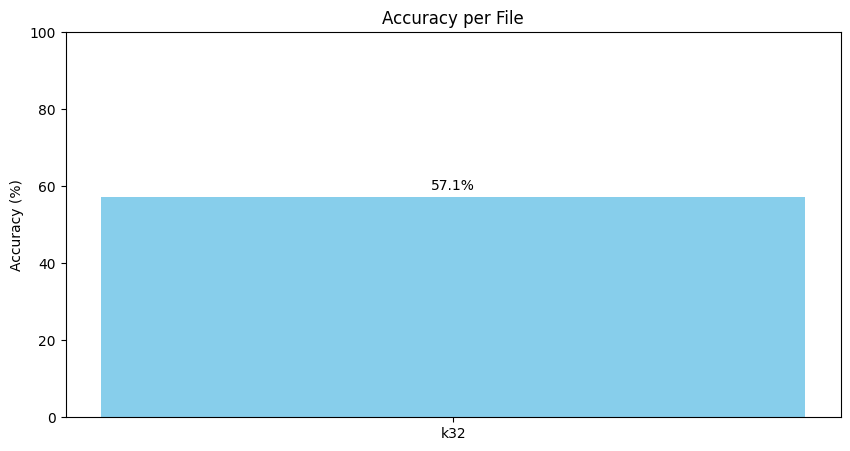

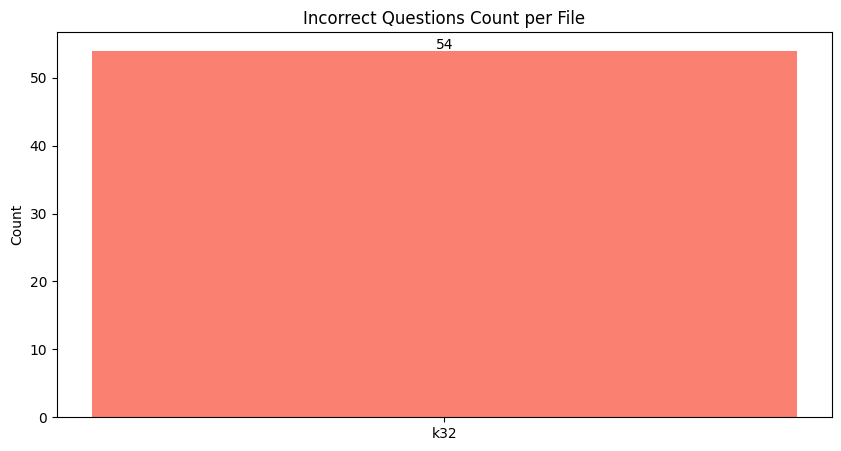

k32 - Incorrect Questions: [1, 9, 11, 16, 18, 20, 21, 22, 28, 30, 32, 34, 35, 41, 44, 50, 53, 56, 57, 58, 60, 63, 64, 70, 73, 74, 77, 79, 81, 84, 87, 90, 91, 92, 93, 94, 95, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 110, 111, 113, 120, 121, 122, 123]


In [1]:
import os
from word2number import w2n
import inflect
import matplotlib.pyplot as plt

p = inflect.engine()

def normalize_number_words(text):
    words = text.split()
    normalized = []
    for word in words:
        try:
            number = str(w2n.word_to_num(word))
            normalized.append(number)
        except:
            try:
                if word.isdigit():
                    word = p.number_to_words(int(word))
            except:
                pass
            normalized.append(word)
    return " ".join(normalized)

def evaluate_file(file_path):
    results = []
    false_questions = []
    try:
        with open(file_path, 'r', encoding='utf-8') as file:
            lines = [line.strip() for line in file if line.strip()]
    except FileNotFoundError:
        print(f"File not found: {file_path}")
        return None, None

    question_num = 1
    for i in range(0, len(lines) - 1, 2):
        if not lines[i].startswith("Ground Truth:") or not lines[i + 1].startswith("LLM Answer:"):
            continue

        ground = lines[i].replace("Ground Truth:", "").strip().lower()
        llm = lines[i + 1].replace("LLM Answer:", "").strip().lower()
        ground_norm = normalize_number_words(ground)
        llm_norm = normalize_number_words(llm)

        is_correct = (
            ground in llm or llm in ground or
            ground_norm in llm_norm or llm_norm in ground_norm
        )

        results.append(is_correct)
        if not is_correct:
            false_questions.append(question_num)

        question_num += 1

    if not results:
        return None, None

    accuracy = sum(results) / len(results)
    return accuracy, false_questions

# === Evaluate Multiple Files ===
files = ['k32q5.txt']
file_labels = ['k32']
accuracies = []
false_counts = []
false_details = {}

for label, file in zip(file_labels, files):
    acc, false_qs = evaluate_file(file)
    if acc is not None:
        accuracies.append(acc * 100)
        false_counts.append(len(false_qs))
        false_details[label] = false_qs
    else:
        accuracies.append(0)
        false_counts.append(0)
        false_details[label] = []

# === Plot Accuracy ===
plt.figure(figsize=(10, 5))
plt.bar(file_labels, accuracies, color='skyblue')
plt.title('Accuracy per File')
plt.ylabel('Accuracy (%)')
plt.ylim(0, 100)
for i, acc in enumerate(accuracies):
    plt.text(i, acc + 2, f"{acc:.1f}%", ha='center')
plt.show()

# === Plot Incorrect Counts ===
plt.figure(figsize=(10, 5))
plt.bar(file_labels, false_counts, color='salmon')
plt.title('Incorrect Questions Count per File')
plt.ylabel('Count')
for i, cnt in enumerate(false_counts):
    plt.text(i, cnt + 0.2, f"{cnt}", ha='center')
plt.show()

# === Print details ===
for label in file_labels:
    print(f"{label} - Incorrect Questions: {false_details[label]}")
